In [25]:
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt

from skfda import FDataGrid, FData
from skfda.preprocessing.dim_reduction import FPCA

from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

Read values an impute sequence with up to 2 missing values

In [26]:
cardiac_indices_df = pd.read_csv("data/cardiac_indices_mine_61390.csv")
lvv_wide_df = cardiac_indices_df.pivot(index="ID", columns="timeframe", values="LVV")
rvv_wide_df = cardiac_indices_df.pivot(index="ID", columns="timeframe", values="RVV")
lvm_wide_df = cardiac_indices_df.pivot(index="ID", columns="timeframe", values="LVM")

na_count_df = lvv_wide_df.isna().apply(lambda x: x.sum(), axis=1)
ids_to_impute = na_count_df[(na_count_df > 0) & (na_count_df < 3)].index
ids_with_missing = na_count_df[(na_count_df > 0)].index

def cyclic_interp(row):
    cyclic_row = row.tolist() + [row[1]]  # Create a cyclic row
    cyclic_row = pd.Series(cyclic_row, index=range(1,51+1))
    cyclic_row.interpolate(method='linear', inplace=True)
    # print(cyclic_row)
    return cyclic_row[:-1]  # Return without the last value (cyclic repetition)

# Apply cyclic interpolation to the DataFrame
lvv_df_imputed = pd.DataFrame(lvv_wide_df.loc[ids_to_impute].apply(cyclic_interp, axis=1), columns=lvv_wide_df.columns)
rvv_df_imputed = pd.DataFrame(rvv_wide_df.loc[ids_to_impute].apply(cyclic_interp, axis=1), columns=rvv_wide_df.columns)
lvm_df_imputed = pd.DataFrame(lvm_wide_df.loc[ids_to_impute].apply(cyclic_interp, axis=1), columns=lvm_wide_df.columns)

lvv_wide_df = pd.concat([lvv_wide_df.drop(ids_with_missing), lvv_df_imputed])
lvm_wide_df = pd.concat([lvm_wide_df.drop(ids_with_missing), lvm_df_imputed])
rvv_wide_df = pd.concat([rvv_wide_df.drop(ids_with_missing), rvv_df_imputed])

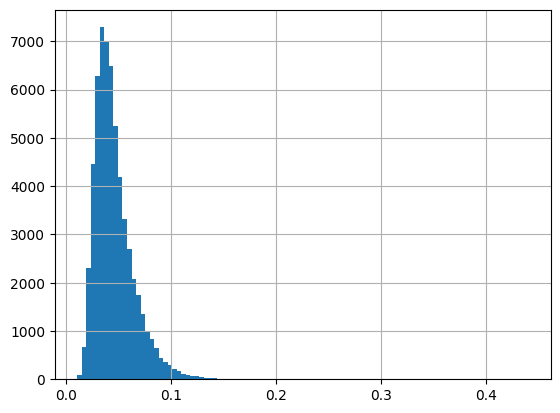

In [27]:
(lvm_wide_df.std(1) / lvm_wide_df.mean(1)).hist(bins=100);

In [28]:
lvv_wide_df / rvv_wide_df

timeframe,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ID,,,,,,,,,,,,,,,,,,,,,
1000215,1.157934,1.163686,1.180482,1.177851,1.170312,1.126122,1.109061,1.115200,1.123339,1.137852,...,1.107579,1.111821,1.109946,1.112890,1.114360,1.116208,1.126456,1.145851,1.170579,1.175787
1000336,1.277835,1.287510,1.299254,1.303127,1.307791,1.304267,1.289858,1.263890,1.218325,1.245949,...,1.220872,1.218062,1.208801,1.195784,1.176859,1.194054,1.212957,1.235591,1.254552,1.265594
1000363,1.139707,1.127091,1.115945,1.131082,1.135791,1.169600,1.201438,1.236450,1.238886,1.228044,...,1.127979,1.130882,1.128161,1.123640,1.121008,1.131044,1.119818,1.116845,1.135603,1.152353
1000380,1.121986,1.123262,1.101348,1.081871,1.054026,1.040723,1.026029,0.993831,0.955187,0.933590,...,1.043865,1.050122,1.047162,1.045864,1.041630,1.046634,1.065298,1.101472,1.117969,1.120148
1000407,1.137561,1.140622,1.126930,1.114719,1.100278,1.088553,1.082551,1.080392,1.086006,1.083731,...,1.079325,1.073166,1.072589,1.078959,1.101014,1.125654,1.144943,1.148911,1.147336,1.138726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741421,1.231002,1.241449,1.233351,1.250644,1.248477,1.236228,1.234641,1.211847,1.238764,1.269769,...,1.218386,1.215527,1.205863,1.209561,1.212864,1.204839,1.198173,1.199912,1.215614,1.223341
5741504,1.045953,1.030192,1.050726,1.071620,1.080630,1.079950,1.075784,1.059649,1.062455,1.007387,...,1.003003,1.003930,1.003941,0.998727,1.005759,1.031997,1.043352,1.059348,1.079975,1.062887
5741520,1.141053,1.138483,1.137847,1.126797,1.121688,1.121951,1.114890,1.104700,1.092962,1.076467,...,1.089391,1.094590,1.094244,1.100455,1.106926,1.119800,1.129451,1.133541,1.136184,1.138568


In [4]:
@interact
def plot_curves(i=widgets.IntSlider(max=1000)):
    
    plt.plot(lvv_wide_df.iloc[i,:])
    plt.plot(rvv_wide_df.iloc[i,:])
    plt.plot(lvm_wide_df.iloc[i,:])

interactive(children=(IntSlider(value=0, description='i', max=1000), Output()), _dom_classes=('widget-interact…

In [19]:
@interact
def plot_curves(i=widgets.IntSlider(max=1000)):
    # plt.plot(lvv_wide_df.iloc[i,:])
    # plt.plot(rvv_wide_df.iloc[i,:])
    plt.plot(lvv_wide_df.iloc[i,:] / rvv_wide_df.iloc[i,:])

interactive(children=(IntSlider(value=0, description='i', max=1000), Output()), _dom_classes=('widget-interact…

# Compute functional PCs

___

Using 50 time points

In [7]:
lvv_wide_df / rvv_wide_df

timeframe,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ID,,,,,,,,,,,,,,,,,,,,,
1000215,1.157934,1.163686,1.180482,1.177851,1.170312,1.126122,1.109061,1.115200,1.123339,1.137852,...,1.107579,1.111821,1.109946,1.112890,1.114360,1.116208,1.126456,1.145851,1.170579,1.175787
1000336,1.277835,1.287510,1.299254,1.303127,1.307791,1.304267,1.289858,1.263890,1.218325,1.245949,...,1.220872,1.218062,1.208801,1.195784,1.176859,1.194054,1.212957,1.235591,1.254552,1.265594
1000363,1.139707,1.127091,1.115945,1.131082,1.135791,1.169600,1.201438,1.236450,1.238886,1.228044,...,1.127979,1.130882,1.128161,1.123640,1.121008,1.131044,1.119818,1.116845,1.135603,1.152353
1000380,1.121986,1.123262,1.101348,1.081871,1.054026,1.040723,1.026029,0.993831,0.955187,0.933590,...,1.043865,1.050122,1.047162,1.045864,1.041630,1.046634,1.065298,1.101472,1.117969,1.120148
1000407,1.137561,1.140622,1.126930,1.114719,1.100278,1.088553,1.082551,1.080392,1.086006,1.083731,...,1.079325,1.073166,1.072589,1.078959,1.101014,1.125654,1.144943,1.148911,1.147336,1.138726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741421,1.231002,1.241449,1.233351,1.250644,1.248477,1.236228,1.234641,1.211847,1.238764,1.269769,...,1.218386,1.215527,1.205863,1.209561,1.212864,1.204839,1.198173,1.199912,1.215614,1.223341
5741504,1.045953,1.030192,1.050726,1.071620,1.080630,1.079950,1.075784,1.059649,1.062455,1.007387,...,1.003003,1.003930,1.003941,0.998727,1.005759,1.031997,1.043352,1.059348,1.079975,1.062887
5741520,1.141053,1.138483,1.137847,1.126797,1.121688,1.121951,1.114890,1.104700,1.092962,1.076467,...,1.089391,1.094590,1.094244,1.100455,1.106926,1.119800,1.129451,1.133541,1.136184,1.138568


In [37]:
fpca1 = FPCA(n_components=10, components_basis=FourierBasis)
fpca2 = FPCA(n_components=5, components_basis=FourierBasis)
fpca3 = FPCA(n_components=10, components_basis=FourierBasis)
fpca4 = FPCA(n_components=20, components_basis=FourierBasis)

lvv_pcs = fpca1.fit_transform(FDataGrid(lvv_wide_df))
lvm_pcs = fpca2.fit_transform(FDataGrid(lvm_wide_df))
rvv_pcs = fpca3.fit_transform(FDataGrid(rvv_wide_df))
lvv2rvv_pcs = fpca4.fit_transform(FDataGrid(lvv_wide_df/rvv_wide_df))

lvv_pcs_df = pd.DataFrame(lvv_pcs, columns=["LVV_FPC" + str(t).zfill(3) for t in range(1, 10+1)], index=lvv_wide_df.index)
lvm_pcs_df = pd.DataFrame(lvm_pcs, columns=["LVM_FPC" + str(t).zfill(3) for t in range(1, 5+1)], index=lvm_wide_df.index)
rvv_pcs_df = pd.DataFrame(rvv_pcs, columns=["RVV_FPC" + str(t).zfill(3) for t in range(1, 10+1)], index=rvv_wide_df.index)
lvv2rvv_pcs_df = pd.DataFrame(lvv2rvv_pcs, columns=["LVV2RVV_FPC" + str(t).zfill(3) for t in range(1, 20+1)], index=lvv_wide_df.index)

In [38]:
fpcs_df = pd.concat([lvv_pcs_df, lvm_pcs_df, rvv_pcs_df], axis=1)

In [39]:
fpcs_df.to_csv("data/functional_PCs_lvv_lvm_rvm.csv")

In [40]:
lvv2rvv_pcs_df.to_csv("data/functional_PCs_lvv2rvv.csv")

___

Using 10 time points

In [12]:
timepoints = range(1, 50, 5)

In [14]:
fpca1_10tf = FPCA(n_components=10, components_basis=FourierBasis)
fpca2_10tf = FPCA(n_components=5, components_basis=FourierBasis)
fpca3_10tf = FPCA(n_components=10, components_basis=FourierBasis)

lvv_pcs = fpca1_10tf.fit_transform(FDataGrid(lvv_wide_df[timepoints]))
lvm_pcs = fpca2_10tf.fit_transform(FDataGrid(lvm_wide_df[timepoints]))
rvv_pcs = fpca3_10tf.fit_transform(FDataGrid(rvv_wide_df[timepoints]))

lvv_pcs_10tf_df = pd.DataFrame(lvv_pcs, columns=["LVV_FPC" + str(t).zfill(3) for t in range(1, 10+1)], index=lvv_wide_df.index)
lvm_pcs_10tf_df = pd.DataFrame(lvm_pcs, columns=["LVM_FPC" + str(t).zfill(3) for t in range(1, 5+1)], index=lvm_wide_df.index)
rvv_pcs_10tf_df = pd.DataFrame(rvv_pcs, columns=["RVV_FPC" + str(t).zfill(3) for t in range(1, 10+1)], index=rvv_wide_df.index)

In [15]:
fpcs_10tf_df = pd.concat([lvv_pcs_10tf_df, lvm_pcs_10tf_df, rvv_pcs_10tf_df], axis=1)

In [22]:
fpcs_10tf_df.to_csv("data/functional_PCs_lvv_lvm_rvm_10tf.csv")

___

#### Interpretation of functional PCs

In [41]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

In [46]:
quantiles = [0.05, 0.15, 0.35, 0.5, 0.65, 0.85, 0.95]
z_quantiles = np.quantile(lvv2rvv_pcs, quantiles, axis=0)

@interact
def plot_curve(
    z_var=widgets.IntSlider(min=0,max=19)):
    # z_var=widgets.Dropdown(options={f"z_{i+1}": i for i in range(10) })):
    #z_value=widgets.IntSlider(min=-3, max=3)
    
    for z_value in range(z_quantiles.shape[0]):
        
        z_value = z_quantiles[z_value, z_var]
        
        z = z_value * np.identity(20)[:,z_var]
        
        # z = np.array([0] * fpca1.n_components)
        curve = fpca4.inverse_transform(z)
        curve = [x[0] for x in curve.data_matrix[0]]
        
        plt.plot(curve)

interactive(children=(IntSlider(value=0, description='z_var', max=19), Output()), _dom_classes=('widget-intera…